The following notebook is used to test efficiency in our RDS package. We begin looking at the difference in using generic functions versus defined functions.

In [1]:
include("rds.jl")
include("graphics.jl")

rds = RDS(Interval{Closed, Closed}(0,1), 1, Normal())

f(ω, x) = mod(ω, 1) * x 
(ω, x) -> mod(ω, 1) * x 
function func(ω::Real, x::Real)
    return mod(ω, 1) * x
end


(process:8716): GLib-GIO-CRITICAL **: 12:57:35.353: Subkey name '\"URL: vgdrm Protocol\"' starts with '\'


func (generic function with 1 method)

Below are the differences in efficiency for the above function implementations. There is no real time difference between the three long term. Notice though that for small sample sizes though, generic functions are the slowest. Since there is really no notiocable best implementation across all sample sizes, we can use generic functions and make a `func::Function` field in our struct `RDS` to make our package more user friendly. 

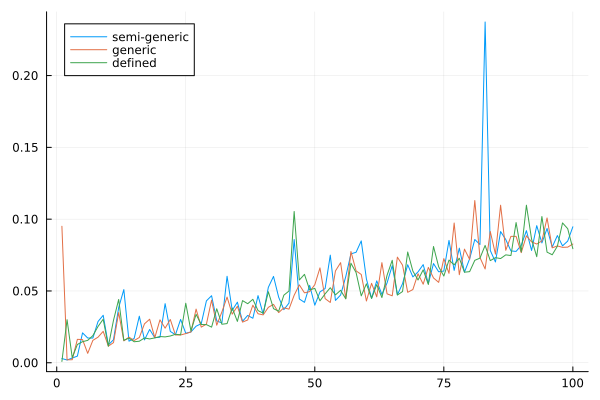

In [3]:
time1=[]
time2=[]
time3=[]

for i in 10000:10000:1000000
    x0=sampling(i, Normal())
    et1 = @elapsed begin
        sampleTraj(rds, 10, x0, f)
    end
    push!(time1,et1)

    et2 = @elapsed begin
        sampleTraj(rds, 10, x0, (ω, x) -> mod(ω, 1) * x)
    end
    push!(time2,et2)

    et3 = @elapsed begin
        sampleTraj(rds, 10, x0, func)
    end
    push!(time3,et3)
end

plot(time1, label="semi-generic")
plot!(time2, label="generic")
plot!(time3, label="defined")